In [28]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [29]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [30]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [31]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [32]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
numerical_columns = ["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d",	"price_change_percentage_60d", "price_change_percentage_200d",	"price_change_percentage_1y"]

scaler = StandardScaler()

market_data_scaled = scaler.fit_transform(df_market_data[numerical_columns])

In [33]:
# Create a DataFrame with the scaled data
df_market_data_transformed = pd.DataFrame(market_data_scaled, columns=numerical_columns)

# Copy the crypto names from the original DataFrame
df_market_data_transformed['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_market_data_transformed.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
df_market_data_transformed.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [34]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,12))

In [35]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_transformed)
    inertia_values.append(kmeans.inertia_)
    print(inertia_values)

C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

[287.0]
[287.0, 212.12334207486256]
[287.0, 212.12334207486256, 170.19357087970297]
[287.0, 212.12334207486256, 170.19357087970297, 79.02243535120975]


C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 212.12334207486256, 170.19357087970297, 79.02243535120975, 71.0979135124442]
[287.0, 212.12334207486256, 170.19357087970297, 79.02243535120975, 71.0979135124442, 66.10882678044752]
[287.0, 212.12334207486256, 170.19357087970297, 79.02243535120975, 71.0979135124442, 66.10882678044752, 54.488123156241166]


C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[287.0, 212.12334207486256, 170.19357087970297, 79.02243535120975, 71.0979135124442, 66.10882678044752, 54.488123156241166, 43.22469266658042]
[287.0, 212.12334207486256, 170.19357087970297, 79.02243535120975, 71.0979135124442, 66.10882678044752, 54.488123156241166, 43.22469266658042, 32.860884471226804]
[287.0, 212.12334207486256, 170.19357087970297, 79.02243535120975, 71.0979135124442, 66.10882678044752, 54.488123156241166, 43.22469266658042, 32.860884471226804, 28.404884636873096]
[287.0, 212.12334207486256, 170.19357087970297, 79.02243535120975, 71.0979135124442, 66.10882678044752, 54.488123156241166, 43.22469266658042, 32.860884471226804, 28.404884636873096, 24.116198421409198]


C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
elbow_df

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


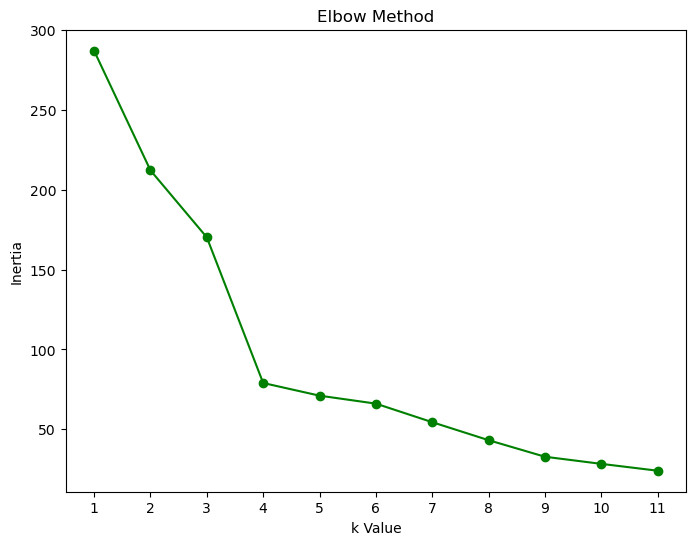

In [40]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='g')
plt.title('Elbow Method')
plt.xlabel('k Value')
plt.ylabel('Inertia')
plt.xticks(k_values)

plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 4 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [42]:
# Initialize the K-Means model using the best value for k
best_k_value = 4

kmeans = KMeans(n_clusters=best_k_value, random_state=42)

In [43]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_market_data_transformed)

C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [44]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_predictions = kmeans.predict(df_market_data_transformed)

# Print the resulting array of cluster values.
cluster_predictions

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [46]:
# Create a copy of the scaled DataFrame
df_clusters = df_market_data_transformed.copy()

In [47]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_clusters['cluster'] = cluster_predictions

# Display the copy of the scaled DataFrame
print(df_clusters.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [48]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_clusters.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c="cluster", 
    colormap="viridis",
    hover_cols=["cluster", "coin_id"],
    size=10, 
    width=800,
    height=400,
    title="Cryptocurrency Clusters based on Price Changes"
)

scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [50]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [51]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df_market_data_transformed)
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])

# View the scaled PCA data
print(pca_df.head())

        PC1       PC2       PC3
0 -0.600667  0.842760  0.461595
1 -0.458261  0.458466  0.952877
2 -0.433070 -0.168126 -0.641752
3 -0.471835 -0.222660 -0.479053
4 -1.157800  2.041209  1.859715


In [52]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(explained_variance.sum())

[0.3719856  0.34700813 0.17603793]
0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:0.8950316570309841

In [53]:
# Create a new DataFrame with the PCA data.
pca_df_with_names = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original scaled DataFrame
pca_df_with_names['coin_id'] = df_market_data_transformed.index

# Set the coin_id column as index
pca_df_with_names.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
pca_df_with_names.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [58]:
## Create a list with the number of k-values from 1 to 11
k_values_2 = list(range(1, 12))

In [59]:
# Create an empty list to store the inertia values
inertia_values_2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values_2:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df_with_names[["PC1", "PC2", "PC3"]])
    inertia_values_2.append(kmeans.inertia_)

C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

In [60]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_2 = {"k": k_values_2, "inertia": inertia_values_2}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_2= pd.DataFrame(elbow_data_2)

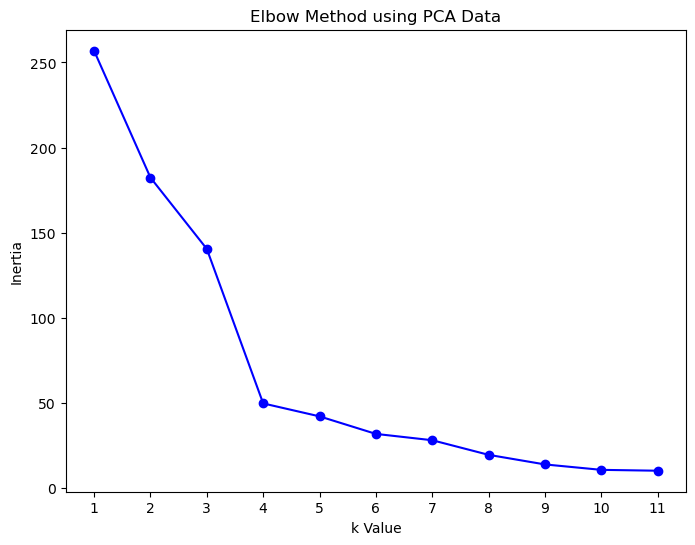

In [62]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df_2["k"], elbow_df_2["inertia"], marker='o', linestyle='-', color='b')
plt.title('Elbow Method using PCA Data')
plt.xlabel('k Value')
plt.ylabel('Inertia')
plt.xticks(k_values)

plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer: 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: No, it does not differ. They are both 4.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [63]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3, random_state=42)

In [64]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df_with_names[["PC1", "PC2", "PC3"]])

C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [65]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
cluster_labels = kmeans.predict(pca_df_with_names[["PC1", "PC2", "PC3"]])

# Print the resulting array of cluster values.
cluster_labels

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2])

In [67]:
# Create a copy of the scaled PCA DataFrame
pca_df_with_names_copy = pca_df_with_names.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_df_with_names_copy['Cluster'] = cluster_labels

# Display the copy of the scaled PCA DataFrame
pca_df_with_names_copy.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [68]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot = pca_df_with_names_copy.hvplot.scatter(
    x="PC1", y="PC2", c="Cluster", cmap="Set1", size=100, 
    hover_cols=['Cluster', 'coin_id'], title="K Means Clustering of Cryptocurrencies using PCA Data"
)

scatter_plot

:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

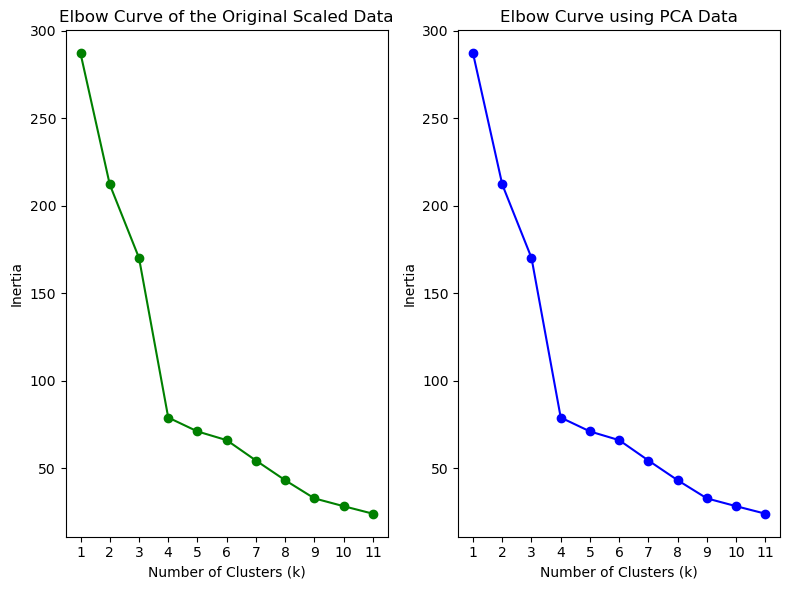

In [75]:
# Composite plot to contrast the Elbow curves
inertia_scaled = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_transformed[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])
    inertia_scaled.append(kmeans.inertia_)

elbow_scaled_data = pd.DataFrame({"k": k_values, "inertia": inertia_scaled})
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(elbow_scaled_data["k"], elbow_scaled_data["inertia"], marker='o', linestyle='-', color='g')
plt.title('Elbow Curve of the Original Scaled Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)

plt.subplot(1, 2, 2)
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve using PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)

plt.tight_layout()
plt.show()


In [77]:
# Composite plot to contrast the clusters
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(df_market_data_transformed[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

df_market_data_transformed['Cluster_Original'] = kmeans_original.predict(df_market_data_transformed[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

scatter_original = df_market_data_transformed.hvplot.scatter(
    x="price_change_percentage_24h", y="price_change_percentage_7d", c="Cluster_Original", cmap="Set1", size=100,
    hover_cols=["coin_id", "Cluster_Original"], title="K-Means Clustering of Original Scaled Data"
)

scatter_pca = pca_df_with_names_copy.hvplot.scatter(
    x="PC1", y="PC2", c="Cluster", cmap="Set1", size=100,
    hover_cols=["coin_id", "Cluster"], title="K-Means Clustering using PCA Data"
)

scatter_original + scatter_pca

C:\Users\ander\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster_Original,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer: The results are more straightforward to interpret, which could lead to a more efficent analysis. However, you are losing out a wider set of features. Depending on what you need, it could be positive or negative.